In [1]:
%matplotlib inline

View [Top 100 Contractors of the U.S. federal government](https://en.wikipedia.org/wiki/Top_100_Contractors_of_the_U.S._federal_government).

The Excel file is divided into tabs. The first tab covers all the Federal government while the remaining tabs are by department.

Created SQLite3 database of the department specific actions (contracts) and dollar amounts. It has **two** tables. The first "contractors" have an id (as a primary key) and a global_vendor_name (as a varchar). The second includes an id (primary key), department, actions (number of actions), dollars (dollars obligated) and contractor_id as a foreign key to the contractors table.


In [3]:
#importing pandas and sqlite

import pandas as pd
import sqlite3


In [ ]:
# creating database

c = sqlite3.connect("contractors.db")

Creating table 1, The first "contractors" should have an id (as a primary key) and a global_vendor_name (as a varchar)

In [4]:
createFirstTable = "CREATE TABLE first (id integer primary key, GlobalVendorName varchar)"
c.execute(createFirstTable)

In [5]:
insertIntoFirst = "INSERT INTO first (GlobalVendorName) SELECT distinct GlobalVendorName from contractors;"
c.execute(insertIntoFirst)


The second should include an id (primary key), department, actions (number of actions), dollars (dollars obligated) and contractor_id as a foreign key to the contractors table.

In [6]:
createSecondTable = "CREATE TABLE second (id integer primary key,department text, actions int, dollars real, name text, contractor_id int )"

c.execute(createSecondTable)

In [9]:
tally = '''select contractors.Department as department, contractors.NumberOfActions as actions, contractors.DollarsObligated as dollars, 
contractors.GlobalVendorName as name, first.id as contractor_id from contractors INNER JOIN first
ON contractors.GlobalVendorName=first.GlobalVendorName ;'''

filldata  = c.execute(tally).fetchall()

insertIntoSecond = '''INSERT INTO second (department,actions,dollars,name,contractor_id ) values (?,?,?,?,?);'''

In [10]:
c.executemany(insertIntoSecond ,filldata)

1. What are the total actions and dollars obligated by department?


In [12]:
query1 = c.execute("SELECT department, sum(actions),sum(dollars) FROM second GROUP BY department ;").fetchall()

dpt = []
act = []
dollar = []

for each in query1:
    dpt.append(each[0])
    act.append(each[1])
    dollar.append(each[2])

data_query1=pd.DataFrame(dpt, columns=['Department'])
data_query1['Actions']= act
data_query1['Dollar']=dollar

#taken from stackoverflow
pd.set_option('display.max_rows', len(data_query1))
print(data_query1)
pd.reset_option('display.max_rows')

                        Department  Actions        Dollar
0               Agriculture (1200)     5485  2.775054e+09
1                 Air Force (5700)    41352  4.595283e+10
2                      Army (2100)    44579  5.433987e+10
3                  Commerce (1300)    10739  1.532774e+09
4                       DoD (9700)  7295791  2.024188e+11
5                       EPA (6800)    10868  1.166138e+09
6                 Education (9100)     1673  2.509561e+09
7                    Energy (8900)     4461  2.346931e+10
8   Health & Human Services (7500)    12430  1.364998e+10
9         Homeland Security (7000)    13593  8.335305e+09
10      Housing & Urban Dev (8600)      932  1.660497e+09
11                 Interior (1400)     8139  1.919173e+09
12                  Justice (1500)    44910  4.569549e+09
13                    Labor (1600)     3171  1.757983e+09
14                     NASA (8000)    14810  1.338423e+10
15                     Navy (1700)    81427  7.334406e+10
16            

 What is Johns Hopkins University's number of actions and dollars by department?


In [15]:
query2 = c.execute("SELECT department, SUM(actions), SUM(dollars) FROM second where name = 'JOHNS HOPKINS UNIVERSITY' group by department ;").fetchall()


In [16]:
dpt = []
act = []
dollar = []

for each in query2:
    dpt.append(each[0])
    act.append(each[1])
    dollar.append(each[2])

data_query2=pd.DataFrame(dpt, columns=['Department'])
data_query2['Actions']= act
data_query2['Dollar']=dollar


pd.set_option('display.max_rows', len(data_query2))
print(data_query2)
pd.reset_option('display.max_rows')

                       Department  Actions        Dollar
0                      DoD (9700)     1323  6.942884e+08
1  Health & Human Services (7500)      203  6.435527e+07
2                     NASA (8000)      386  1.617388e+08
3                     Navy (1700)      706  4.810786e+08


What is the count of vendors by deparments (how many vendors received contracts from 1 department, 2 departments, etc.). Using the percent of total vendors (instead of raw counts), make a chart of these results.

In [17]:
import numpy as np
count = []
x=[]

query3 = c.execute("SELECT name, count (*) department FROM second GROUP BY name ;").fetchall()
for each in query3:
    count.append(each[1])
y = np.bincount(count)  

for i in range(0,len(y)):
    x.append(i)

data_query3=pd.DataFrame(x, columns=['department'])
data_query3['Vendor']= y


pd.set_option('display.max_rows', len(data_query3))
print(data_query3)
pd.reset_option('display.max_rows')



    department  Vendor
0            0       0
1            1    1099
2            2     111
3            3      38
4            4      27
5            5      16
6            6       9
7            7      11
8            8       4
9            9       7
10          10       1
11          11       2
12          12       1
13          13       2
14          14       0
15          15       0
16          16       4
17          17       1


In [18]:
%matplotlib inline
import matplotlib.pyplot as plot

percent = []
chart=[]
for each in y:
    each = (each/float(2386))*100
    percent.append(each)
for x in range(len(percent)):
    chart.append(x)
print chart
print percent

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0.0, 46.06035205364627, 4.6521374685666386, 1.5926236378876781, 1.1316010058675607, 0.67057837384744345, 0.37720033528918695, 0.46102263202011728, 0.16764459346186086, 0.2933780385582565, 0.041911148365465216, 0.083822296730930432, 0.041911148365465216, 0.083822296730930432, 0.0, 0.0, 0.16764459346186086, 0.041911148365465216]


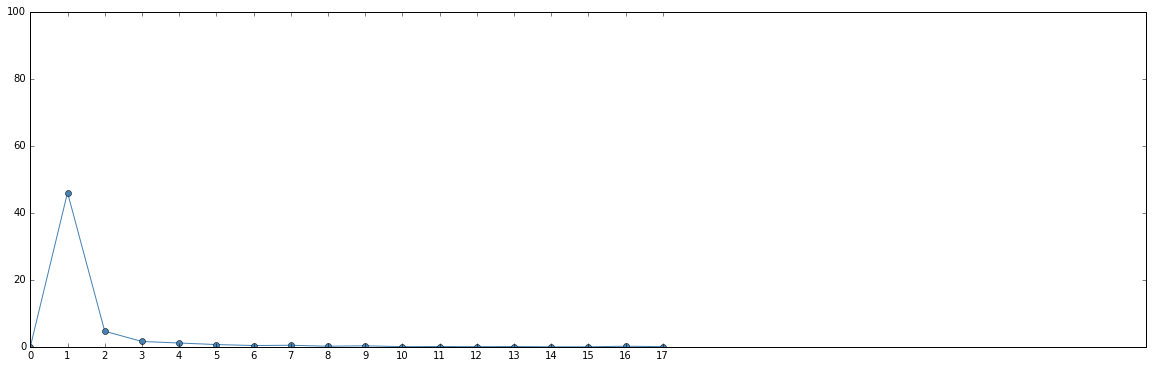

In [19]:
figure = plot.figure(figsize=(20, 6))
axes = figure.add_subplot(1, 1, 1)
axes.plot(chart, percent, "o-", color="steelblue")
axes.set_xlim((0, 30))
axes.set_ylim((0, 100))
axes.set_xticks(chart)


Looks like a exponential distribution